# 📤 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 
sns.set()

# 💾 Reading Data
Can download the dataset from this link : https://www.kaggle.com/aungpyaeap/fish-market

In [2]:
data=pd.read_csv(r'C:\Users\vicky\Downloads\Fish.csv')
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


# 💾 Checking Out the Data

In [3]:
data.info()
print("\nData Shape :",data.shape,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB

Data Shape : (159, 7) 



In [4]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
data.isnull().sum(axis = 0)

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Now, Checking and Removing Outliers

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

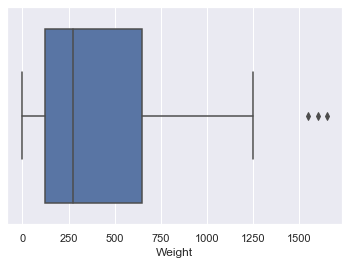

In [6]:
sns.boxplot(data['Weight'])

Can Clearly See 3 Outliers

In [7]:
Q1 = np.percentile(data['Weight'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Weight'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Weight'] >= Q3+1.5*IQR)
# Lower bound
lower = np.where(data['Weight'] <= Q1-1.5*IQR)

''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

print("New Shape: ", data.shape)

Old Shape:  (159, 7)
New Shape:  (156, 7)


# 📊 Exploratory Data Analysis (EDA)

In [8]:
sns.set()

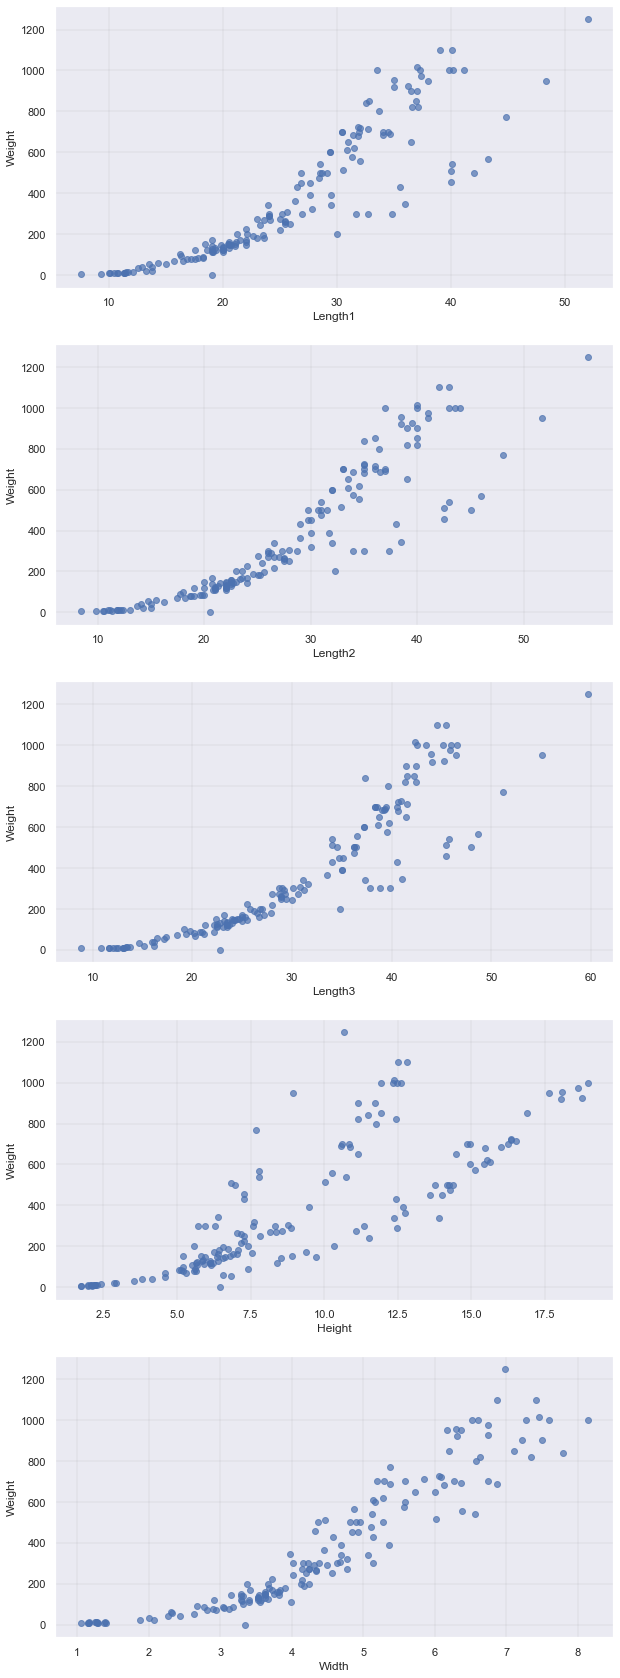

In [9]:
j=0
fig,ax=plt.subplots(5,figsize=(10,30))
for column in data.drop(['Weight','Species'],axis=1):
    ax[j].scatter(x=data[column],y=data['Weight'],alpha=0.7)
    ax[j].set_xlabel(column)
    ax[j].set_ylabel("Weight")
    ax[j].grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
    j+=1

All the Columns Seem to have a Squared Function Trent or a Cubic Function Trend instead of a Linear Trend

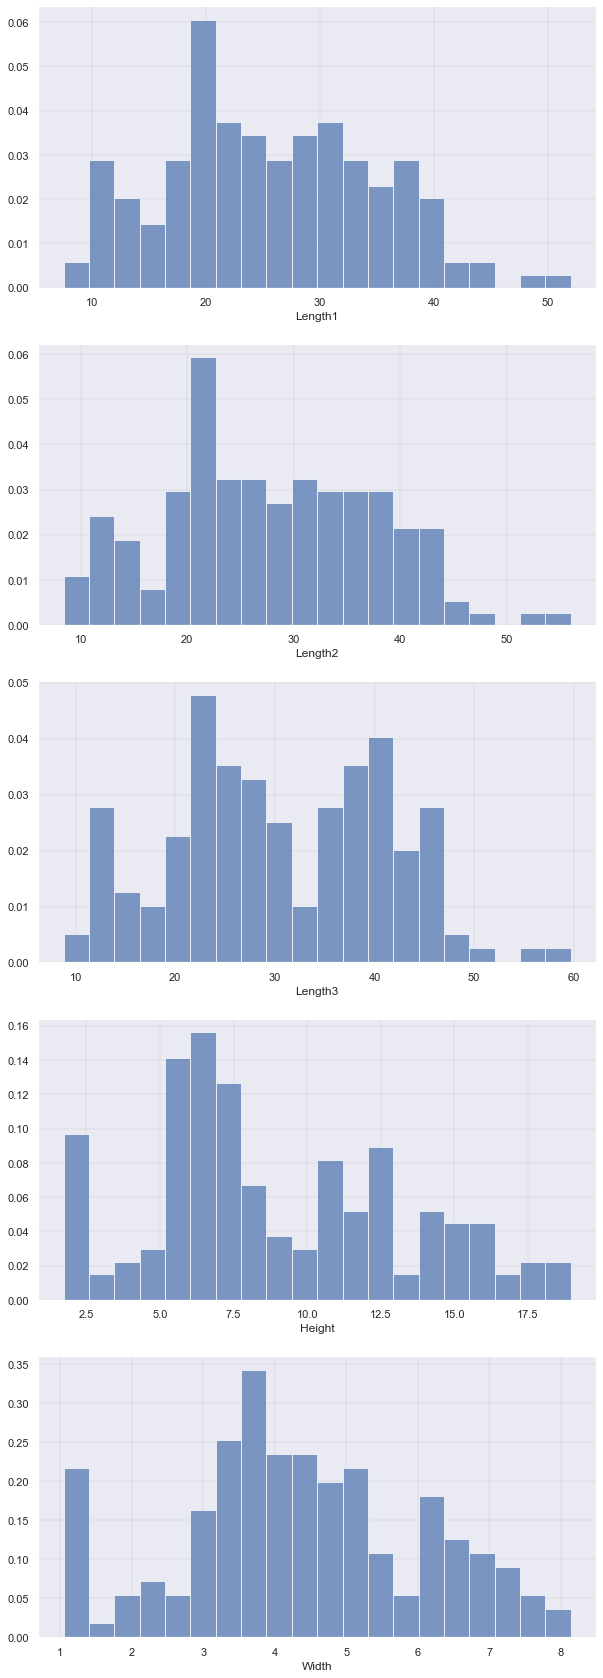

In [10]:
j=0
fig,ax=plt.subplots(5,figsize=(10,30))
for column in data.drop(['Weight','Species'],axis=1):
    ax[j].hist(data[column],bins=20,density=True,alpha=0.7)
    ax[j].set_xlabel(column)
    ax[j].grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
    j+=1

Data is Not as Normal as we hoped it would Be but it is Decent

Trying Out Squaring the Columns :-

In [11]:
## Adding Squared Columns in DataSet
data['WidthSquared']=data['Width']**2
data['Length1Squared']=data['Length1']**2
data['Length2Squared']=data['Length2']**2
data['Length3Squared']=data['Length3']**2
data['HeightSquared']=data['Height']**2
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,WidthSquared,Length1Squared,Length2Squared,Length3Squared,HeightSquared
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,16.160400,538.24,645.16,900.00,132.710400
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,18.538191,576.00,691.69,973.44,155.750400
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,22.053355,571.21,702.25,967.21,153.209933
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,19.851480,691.69,841.00,1122.25,162.052900
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,26.357956,702.25,841.00,1156.00,154.853136


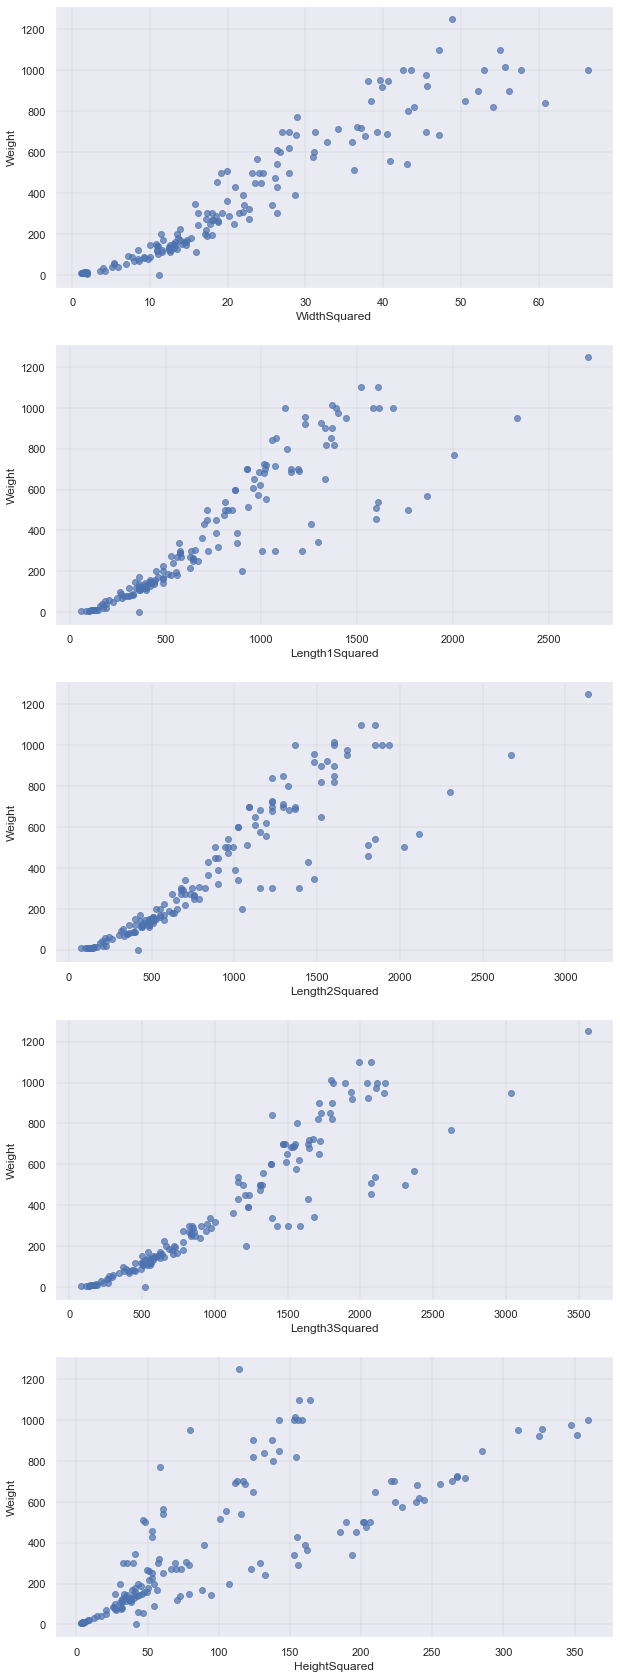

In [12]:
## Plotting Scatter Plots
j=0
fig,ax=plt.subplots(5,figsize=(10,30))
for column in data.drop(['Weight','Species','Length1','Length2','Length3','Height','Width'],axis=1):
    ax[j].scatter(x=data[column],y=data['Weight'],alpha=0.7)
    ax[j].set_xlabel(column)
    ax[j].set_ylabel("Weight")
    ax[j].grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
    j+=1

Definately More Linear Then Before But We can see Some High Heteroskedasticity in Height Squared so it's P value will be useless 

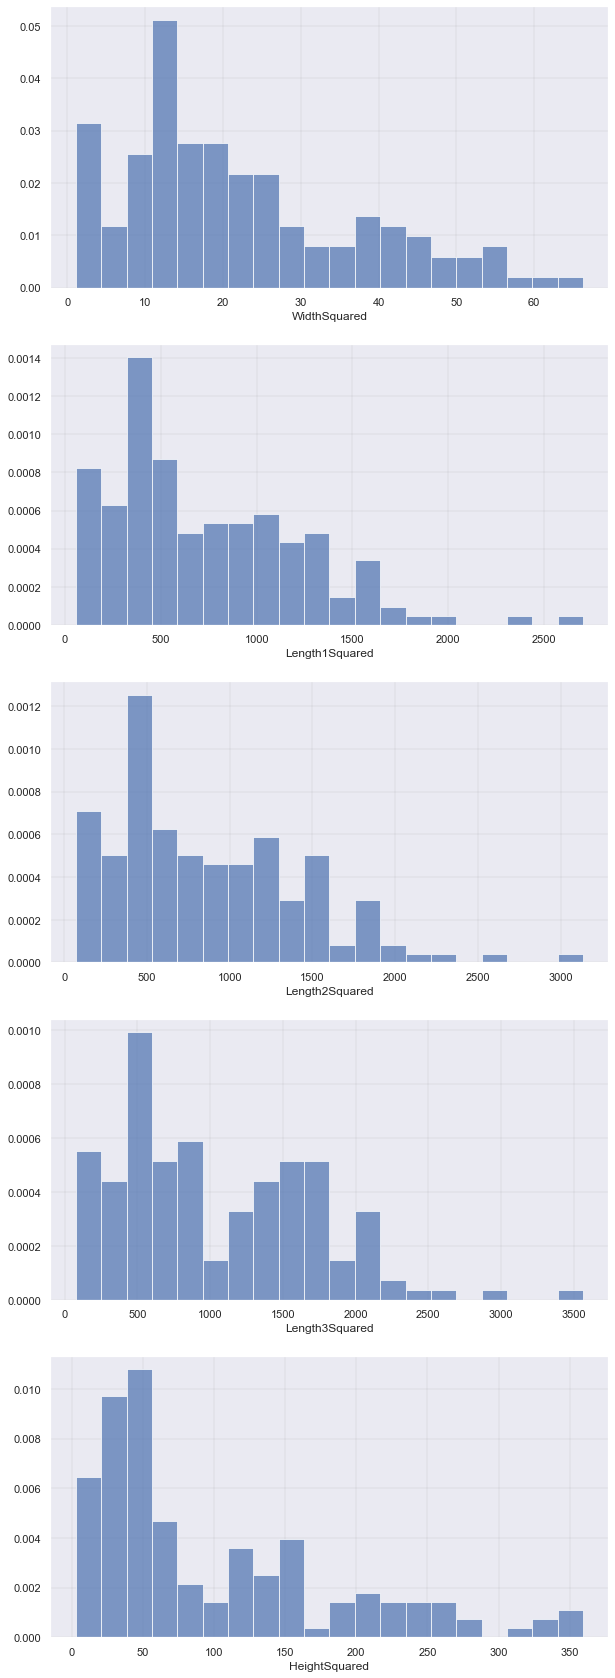

In [13]:
j=0
fig,ax=plt.subplots(5,figsize=(10,30))
for column in data.drop(['Weight','Species','Length1','Length2','Length3','Height','Width'],axis=1):
    ax[j].hist((data[column]),bins=20,density=True,alpha=0.7)
    ax[j].set_xlabel(column)
    ax[j].grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
    j+=1

Data is definately Right Skewed but since there are no outliers, we can let this slide

# Checking Correlation

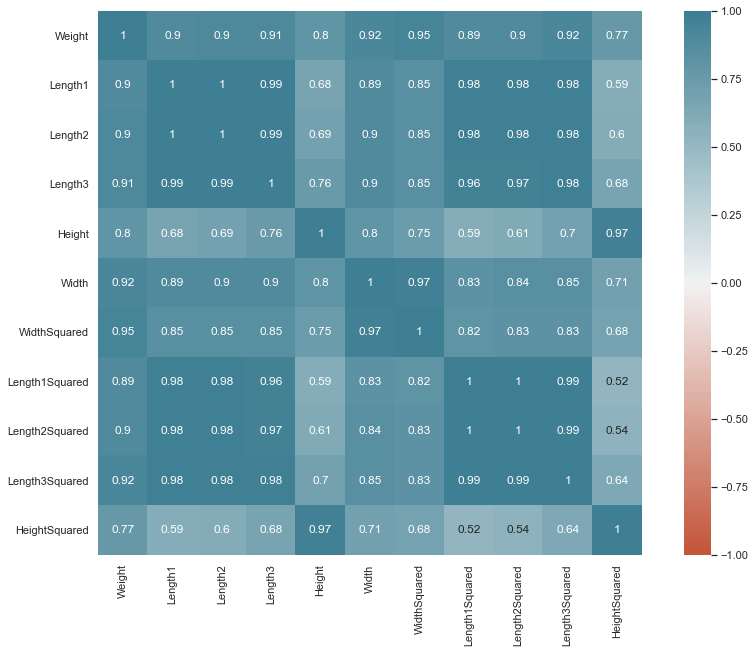

In [14]:
c=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
a=sns.heatmap(
    c,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True,
    annot=True,
)

Length1 Length2 and Length3 are Highly Correlated, So we Drop Length1 and Length2 because Length3 shows the Highest Correlation with Weight 

In [15]:
data=pd.concat([data,pd.get_dummies(data["Species"],drop_first=True)],1)
data=data.drop(['Length1','Length2','Length1Squared','Length2Squared','Species'],axis=1)

Now That Our Data seems fits all the Linear Regression Assumptions i.w Linearity, No  Heteroskedasticity, No Autocorrelation, No MultiCollinearity, Normal Distribution of Data and Normal Distribution of Error

# 🧱 Train Test Split

In [16]:
X=data.drop(['Weight'],axis=1).values.reshape(-1,12)
Y=data['Weight'].values.reshape(156)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# 📈 Training a Linear Regression Model

In [18]:
reg = linear_model.LinearRegression() 

reg.fit(x_train, y_train) 
print('Coefficient : ', reg.coef_,' and Y-Intercept : ',reg.intercept_) 

Coefficient :  [-9.62446402e+00  3.25176177e+01 -9.95151563e+01  1.46772284e+01
  4.04060771e-01  1.28507048e-01  7.04924736e+01  1.55867271e+02
  6.27428525e+01  1.26877295e+02  1.51746170e+02  1.76860405e+02]  and Y-Intercept :  -49.040433510385014


In [19]:
y_predicted=reg.predict(x_test)

In [20]:
print("Mean Squared error is ", mean_squared_error(y_test,y_predicted))
print("R2 score is ", r2_score(y_test, y_predicted))

Mean Squared error is  2848.1976468251487
R2 score is  0.9721972854835788


# ✔️ Predictions from our Model

C:\Users\vicky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vicky\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


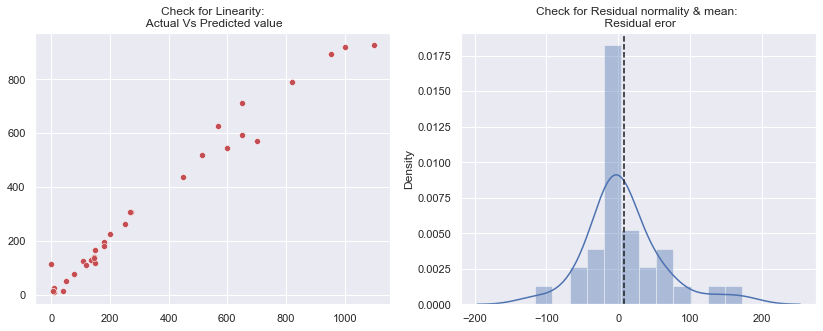

In [21]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_predicted,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_predicted),ax=ax,color='b')
ax.axvline((y_test - y_predicted).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

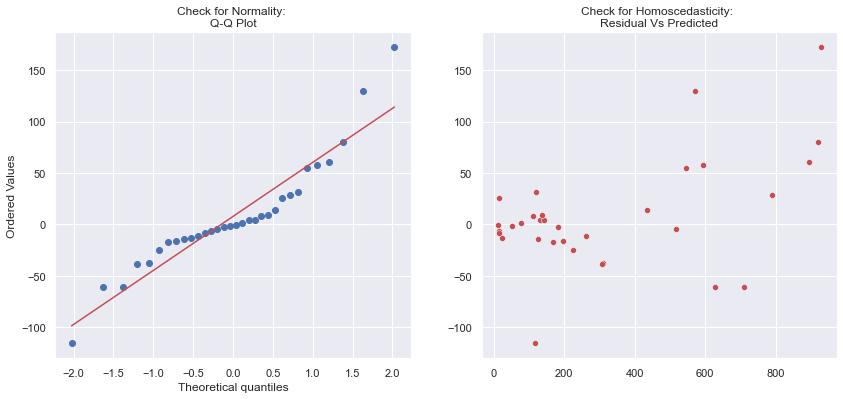

In [22]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_predicted),fit=True,plot=ax[0])
ax[0].set_title('Check for Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_predicted), x= y_predicted, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

# The model's assumptions of linear regression are as follows
In our model, the actual vs predicted plot is linear.

The residual mean is zero and residual error plot is almost perfectly normal

In the Q-Q plot the dots do not scatter much 

The plot definately exhibits heteroscedasticity, error will increase after certian point.